## Imports

In [205]:
import os
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score

## Constants

In [183]:
ROOT_DATA = '../../data/'
M4_DATA_FOLDER_PATH = f'{ROOT_DATA}raw/m4-unified/'
M4_DATA_BINOCULARS_RESULTS_FOLDER_PATH = f'{ROOT_DATA}binoculars/'
BINOCULARS_ACCURACY_THRESHOLD = 0.9015310749276843  # optimized for f1-score
BINOCULARS_FPR_THRESHOLD = 0.8536432310785527  # optimized for low-fpr [chosen at 0.01%]

In [184]:
LLMS = ['bloomz', 'chatgpt', 'cohere', 'davinci', 'human']
DOMAINS = ['arxiv', 'wikihow', 'reddit', 'wikipedia']

## Data

In [185]:
df = pd.DataFrame(columns=['text', 'domain', 'dataset_name', 'is_llm'])

scores_df = pd.DataFrame(columns=['scores'])

In [186]:
dir_path, dir_names, file_names = next(os.walk(M4_DATA_FOLDER_PATH))

for dir in dir_names:
    dataset_folder_path, _, dataset_names = next(os.walk(os.path.join(dir_path, dir)))
    for dataset_name in dataset_names:
        if Path(dataset_name).stem.split("_")[1].lower() not in LLMS:
            continue

        temp_df = pd.read_json(
            path_or_buf=f"{dataset_folder_path}/{dataset_name}", lines=True
        )
        temp_df["domain"] = dir
        temp_df["dataset_name"] = Path(dataset_name).stem
        temp_df["is_llm"] = 0 if "human" in dataset_name else 1
        print(dataset_name, 0 if "human" in dataset_name else 1)

        temp_scores_path = f"{M4_DATA_BINOCULARS_RESULTS_FOLDER_PATH}{Path(dataset_name).stem}.jsonl_scores.csv"
        temp_scores_df = pd.read_csv(temp_scores_path, index_col=0)[['scores']]

        df = pd.concat([df, temp_df], ignore_index=True)
        scores_df = pd.concat([scores_df, temp_scores_df], ignore_index=True)

arxiv_bloomz.jsonl 1
arxiv_chatGPT.jsonl 1
arxiv_cohere.jsonl 1
arxiv_davinci.jsonl 1
arxiv_human.jsonl 0
reddit_bloomz.jsonl 1
reddit_chatGPT.jsonl 1
reddit_cohere.jsonl 1


C:\Users\daniel.georgiev\AppData\Local\Temp\ipykernel_60724\2378825397.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  scores_df = pd.concat([scores_df, temp_scores_df], ignore_index=True)


reddit_davinci.jsonl 1
reddit_human.jsonl 0
wikihow_bloomz.jsonl 1
wikihow_chatGPT.jsonl 1
wikihow_cohere.jsonl 1
wikihow_davinci.jsonl 1
wikihow_human.jsonl 0
wikipedia_bloomz.jsonl 1
wikipedia_chatGPT.jsonl 1
wikipedia_cohere.jsonl 1
wikipedia_davinci.jsonl 1
wikipedia_human.jsonl 0


In [187]:
display(df)

,text,domain,dataset_name,is_llm
0,The present work is devoted to the study of qu...,arxiv,arxiv_bloomz,1
1,We present the results of our analysis of the ...,arxiv,arxiv_bloomz,1
2,We report on spectroscopic observations made w...,arxiv,arxiv_bloomz,1
3,We present new numerical methods for stochasti...,arxiv,arxiv_bloomz,1
4,The Solar Chromosphere is an important compone...,arxiv,arxiv_bloomz,1
...,...,...,...,...
59321,Adolf Fredrik Church () is a church in central...,wikipedia,wikipedia_human,0
59322,I've Been Doin' Some Thinkin' is an album by A...,wikipedia,wikipedia_human,0
59323,Michele Samantha Yi Wen Lean ) (born 1 Septemb...,wikipedia,wikipedia_human,0
59324,The Speaker of the Provincial Assembly of Punj...,wikipedia,wikipedia_human,0


In [188]:
display(scores_df)

,scores
0,0.807105
1,0.853280
2,0.888979
3,0.795741
4,0.732262
...,...
59321,0.918876
59322,0.916065
59323,0.959993
59324,0.894158


In [189]:
df['score'] = scores_df['scores']

In [190]:
display(df)

,text,domain,dataset_name,is_llm,score
0,The present work is devoted to the study of qu...,arxiv,arxiv_bloomz,1,0.807105
1,We present the results of our analysis of the ...,arxiv,arxiv_bloomz,1,0.853280
2,We report on spectroscopic observations made w...,arxiv,arxiv_bloomz,1,0.888979
3,We present new numerical methods for stochasti...,arxiv,arxiv_bloomz,1,0.795741
4,The Solar Chromosphere is an important compone...,arxiv,arxiv_bloomz,1,0.732262
...,...,...,...,...,...
59321,Adolf Fredrik Church () is a church in central...,wikipedia,wikipedia_human,0,0.918876
59322,I've Been Doin' Some Thinkin' is an album by A...,wikipedia,wikipedia_human,0,0.916065
59323,Michele Samantha Yi Wen Lean ) (born 1 Septemb...,wikipedia,wikipedia_human,0,0.959993
59324,The Speaker of the Provincial Assembly of Punj...,wikipedia,wikipedia_human,0,0.894158


In [191]:
df['is_llm_hat'] = df['score'] < BINOCULARS_ACCURACY_THRESHOLD

In [192]:
display(df)

,text,domain,dataset_name,is_llm,score,is_llm_hat
0,The present work is devoted to the study of qu...,arxiv,arxiv_bloomz,1,0.807105,True
1,We present the results of our analysis of the ...,arxiv,arxiv_bloomz,1,0.853280,True
2,We report on spectroscopic observations made w...,arxiv,arxiv_bloomz,1,0.888979,True
3,We present new numerical methods for stochasti...,arxiv,arxiv_bloomz,1,0.795741,True
4,The Solar Chromosphere is an important compone...,arxiv,arxiv_bloomz,1,0.732262,True
...,...,...,...,...,...,...
59321,Adolf Fredrik Church () is a church in central...,wikipedia,wikipedia_human,0,0.918876,False
59322,I've Been Doin' Some Thinkin' is an album by A...,wikipedia,wikipedia_human,0,0.916065,False
59323,Michele Samantha Yi Wen Lean ) (born 1 Septemb...,wikipedia,wikipedia_human,0,0.959993,False
59324,The Speaker of the Provincial Assembly of Punj...,wikipedia,wikipedia_human,0,0.894158,True


In [193]:
df_without_na = df[pd.notna(df['score'])]

In [206]:
y_true = df_without_na['is_llm'].astype(bool)
y_pred = df_without_na['is_llm_hat']

f1 = f1_score(y_true=y_true, y_pred=y_pred, pos_label=0)
precision = precision_score(y_true=y_true, y_pred=y_pred, pos_label=0)
recall = recall_score(y_true=y_true, y_pred=y_pred, pos_label=0)
accuracy = accuracy_score(y_true, y_pred)
print(f'f1: {f1}')
print(f'accuracy: {accuracy}')
print(f'precision: {precision}')
print(f'recall: {recall}')

f1: 0.6203695438721771
accuracy: 0.7788198176333946
precision: 0.4823262700101786
recall: 0.8691121300541892


In [195]:
print(df_without_na[df_without_na['is_llm'] == 1].shape)
print(df_without_na[df_without_na['is_llm'] == 0].shape)

(45691, 6)
(11995, 6)


In [196]:
df[df['is_llm'] != df['is_llm_hat']].to_csv('./wrong_predictions', columns=['dataset_name', 'score', 'is_llm', 'is_llm_hat'])

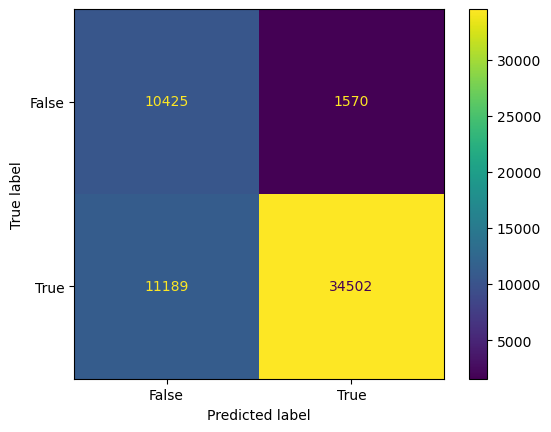

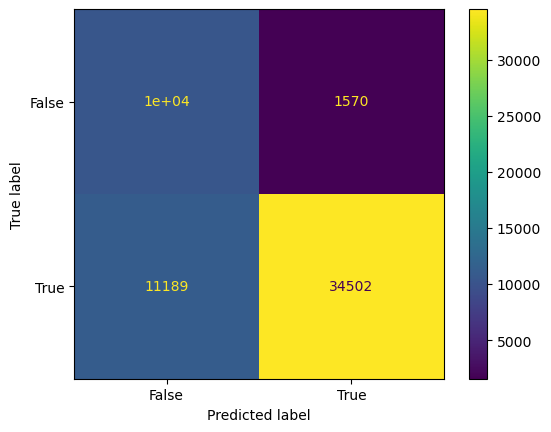

In [203]:
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay.from_predictions(y_true=y_true, y_pred=y_pred, values_format='')
disp.plot()
plt.show()